In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
data = pd.read_csv(r'F:\amruth\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
3537,2.0,7,7,1,10963,1,1,1,0,1,1,2021,4.011325,8.809258
9276,8.0,0,2,5,14959,0,0,0,1,0,0,0,5.472271,7.125779
4759,2.0,0,0,1,12555,1,1,1,0,0,1,2019,4.256463,8.622877


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number_of_rooms    12743 non-null  float64
 1   floor_on           12743 non-null  int64  
 2   total_floors       12743 non-null  int64  
 3   bedroom            12743 non-null  int64  
 4   pincode            12743 non-null  int64  
 5   balkon             12743 non-null  int64  
 6   terrasse           12743 non-null  int64  
 7   garten             12743 non-null  int64  
 8   Gaste-WC           12743 non-null  int64  
 9   Aufzug             12743 non-null  int64  
 10  wohung             12743 non-null  int64  
 11  construction_year  12743 non-null  int64  
 12  living_area_m2     12743 non-null  float64
 13  transform_price    12743 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 1.4 MB


In [4]:
X = data.iloc[:, :-1]
y = data[['transform_price']]
X.shape, y.shape

((12743, 13), (12743, 1))

In [5]:
XX = X.to_numpy()
yy = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [7]:
tf.random.set_seed(200)
#np.random.seed(0.1)
five_layer_model = tf.keras.models.Sequential()
five_layer_model.add(tf.keras.layers.Dense(300, activation='relu',input_dim=X.shape[1:][0]))
five_layer_model.add(tf.keras.layers.Dense(100,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(50,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(10,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(1))

five_layer_model.compile(loss='mse', optimizer='adam', 
                         metrics=['mae'])

In [8]:
history=five_layer_model.fit(X_train,y_train, epochs=50)
predictions = five_layer_model.predict(X_test)


Epoch 1/50
12424/12424 [==============================] - 2s 172us/sample - loss: 1112.4097 - mae: 5.3090
Epoch 2/50
12424/12424 [==============================] - 1s 113us/sample - loss: 40.2863 - mae: 4.1011
Epoch 3/50
12424/12424 [==============================] - 1s 116us/sample - loss: 31.7594 - mae: 3.7415
Epoch 4/50
12424/12424 [==============================] - 1s 111us/sample - loss: 23.7061 - mae: 3.3902
Epoch 5/50
12424/12424 [==============================] - 1s 110us/sample - loss: 19.4804 - mae: 2.8583
Epoch 6/50
12424/12424 [==============================] - 1s 116us/sample - loss: 13.9677 - mae: 2.3595
Epoch 7/50
12424/12424 [==============================] - 1s 115us/sample - loss: 180.5530 - mae: 4.8866
Epoch 8/50
12424/12424 [==============================] - 1s 121us/sample - loss: 7.3023 - mae: 1.8719
Epoch 9/50
12424/12424 [==============================] - 1s 111us/sample - loss: 4.0443 - mae: 1.3809
Epoch 10/50
12424/12424 [==============================] - 1s 1

In [9]:
predictions

array([[ 8.6873045],
       [ 8.290078 ],
       [ 8.36528  ],
       [ 7.4103355],
       [ 7.779088 ],
       [ 8.633578 ],
       [ 8.414686 ],
       [ 8.268372 ],
       [ 8.634764 ],
       [ 8.344364 ],
       [ 8.4944515],
       [ 7.018463 ],
       [ 8.275909 ],
       [ 8.649068 ],
       [ 8.555709 ],
       [ 8.208475 ],
       [ 8.569128 ],
       [ 8.373522 ],
       [ 8.13109  ],
       [ 8.183695 ],
       [ 7.038946 ],
       [ 8.452018 ],
       [ 8.369801 ],
       [ 7.986763 ],
       [ 8.467344 ],
       [ 8.728938 ],
       [ 8.295918 ],
       [ 8.1765785],
       [ 8.547476 ],
       [ 8.693236 ],
       [ 8.389603 ],
       [ 8.213903 ],
       [ 8.519645 ],
       [ 8.27951  ],
       [ 8.317337 ],
       [ 8.620194 ],
       [ 8.368846 ],
       [ 7.682333 ],
       [ 8.059744 ],
       [ 8.09432  ],
       [ 8.292067 ],
       [ 8.206795 ],
       [ 8.3724   ],
       [ 8.665485 ],
       [ 8.413233 ],
       [ 8.641731 ],
       [ 8.652193 ],
       [ 8.32

In [10]:
predictions[:5], y_test.to_numpy()[:5]

(array([[8.6873045],
        [8.290078 ],
        [8.36528  ],
        [7.4103355],
        [7.779088 ]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.684340997237871, 0.39648967454791745)

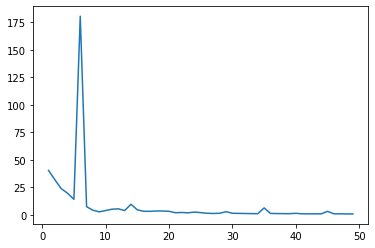

In [14]:
epochs = 50
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])